# ABEL HiPACE++ example

By Carl A. Lindstrøm (University of Oslo), 8 Sep 2023

### Import ABEL framework

In [7]:
from abel import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Define the input beams

In [8]:
# define drive bunch
driver = SourceBasic()
driver.charge = -2e-9 # [C]
driver.energy = 10e9 # [eV]
driver.rel_energy_spread = 0.01
driver.bunch_length = 20e-6 # [m]
driver.z_offset = 100e-6 # [m]
driver.emit_nx, driver.emit_ny = 10e-6, 10e-6 # [m rad]
driver.beta_x, driver.beta_y = 50e-3, 50e-3 # [m]
driver.num_particles = 100000
driver.symmetrize = True

# define stage
stage = StageHipace()
stage.driver_source = driver
stage.length = 0.05 # [m]
stage.plasma_density = 1e22 # [m^-3]
stage.ion_motion = False
stage.beam_ionization = False

In [9]:
# define witness bunch
source = SourceBasic()
source.charge = -0.6e-9 # [C]
source.energy = 100e6 # [eV]
source.rel_energy_spread = 0.01
source.bunch_length = 10e-6 # [m]
source.z_offset = -160e-6 # [m]
source.emit_nx, source.emit_ny = 1e-6, 1e-6 # [m rad]
source.beta_x, source.beta_y = 10e-3, 10e-3 # [m]
source.num_particles = 100000
source.x_offset, source.y_offset = 5e-6, 1e-6 # [m]
source.jitter.x = 5e-6

# define RF accelerator
rf_accelerator = RFAcceleratorBasic()
rf_accelerator.nom_energy_gain = driver.energy-source.energy

# define beam delivery system
bds = BeamDeliverySystemBasic()
bds.beta_x = stage.matched_beta_function(source.energy) # [m]
bds.beta_y = stage.matched_beta_function(source.energy) # [m]

# define linac
linac = ConventionalLinac()
linac.source = source
linac.rf_accelerator = rf_accelerator
linac.bds = bds

### Define the experimental setup

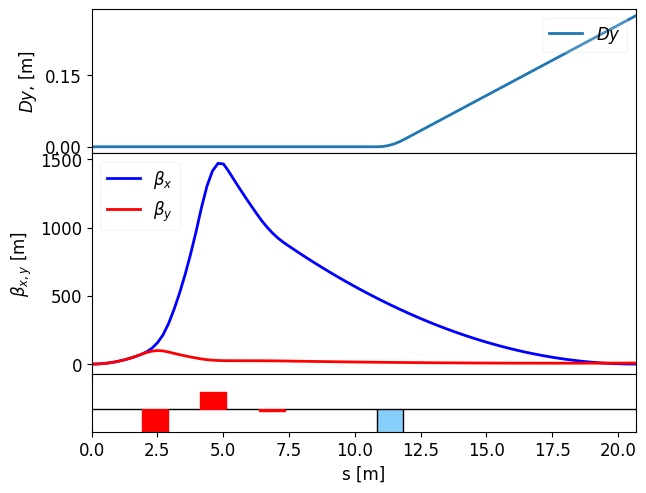

In [10]:
# define spectrometer
spectrometer = SpectrometerFacetOcelot()
spectrometer.exact_tracking = False
spectrometer.bend_angle = -0.03 # [T]
spectrometer.obj_plane = 0 # [m]
spectrometer.mag_x = -2
spectrometer.img_energy = 10e9 # [eV]
spectrometer.plot_twiss()

# define experiment
experiment = ExperimentPWFA(linac, stage, spectrometer)

### Perform linac tracking

In [11]:
# perform experiment tracking
experiment.stage.num_nodes = 1
beam = experiment.run('hipace_example', overwrite=True)

Tracking element 1 (SourceBasic, stage 0, s = 0.0 m, 0.1 GeV, -0.60 nC, 1.0% rms, 1.0/1.0 µm-rad)
Tracking element 2 (RFAcceleratorBasic, stage 0, s = 550.0 m, 10.0 GeV, -0.60 nC, 0.0% rms, 1.0/1.0 µm-rad)
Tracking element 3 (BeamDeliverySystemBasic, stage 0, s = 868.2 m, 10.0 GeV, -0.60 nC, 0.0% rms, 1.0/1.0 µm-rad)
>> Starting HiPACE++ (job 7222868):   0%|                                              | 0/135 [00:44<?, ? steps/s]


KeyboardInterrupt



### Plot the wakefield

In [ ]:
# plot wakefield
experiment.stage.plot_wakefield()
experiment.stage.plot_wake()
experiment.stage.plot_evolution()

### Plot the spectrometer screen

In [ ]:
# plot the spectrometer imaging
spectrometer.plot_twiss()

In [ ]:
# plot the screen
experiment.plot_spectrometer_screen()

### Plot longitudinal phase space

In [ ]:
# plot the longitudinal phase space (at the beginning and end of the stage)
experiment.initial_beam.plot_lps()
experiment.get_beam(-2).plot_lps()